In [ ]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Section 1 - Data Set 1: Women in industry managerial positions by country


# Step 1: Importing the data

In [ ]:
file = pd.read_csv('API_SL.TLF.CACT.FE.ZS_DS2_en_csv_v2_4250833.csv', low_memory = False)
fe_df = pd.DataFrame(file)

fe_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.570922,65.654496,65.643865,65.831169,65.917046,66.125922,66.230084,66.362142,64.111891,64.878198
2,Afghanistan,AFG,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,15.879000,16.794001,17.749001,18.746000,19.798000,20.886999,21.228001,21.566000,16.188999,14.848000
3,Africa Western and Central,AFW,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,56.707668,55.370493,54.999809,54.805393,54.548806,54.295500,54.118607,53.977916,52.764629,52.990739
4,Angola,AGO,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,74.834000,74.833000,74.843002,74.863998,74.882004,74.912003,74.955002,75.011002,73.617996,73.968002


# Step 2: Cleaning the data 

### Step 2a: Removing all columns that dont have information

In [ ]:
fe_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

The years start at index 4 and we know that we dont have any data for 1960 - 1989 so our job is to get rud of those. simple math tells us from 1960 to 1989 requires 29 index movments so we will be deleting index's 4 - 33 but since the last # isnt inclusive well do 4-34

In [ ]:

fe_df.drop(fe_df.iloc[: , 4:34], axis = 1, inplace = True)

fe_df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,64.888276,64.922012,64.988104,65.071321,65.170735,65.405947,...,65.570922,65.654496,65.643865,65.831169,65.917046,66.125922,66.230084,66.362142,64.111891,64.878198
2,Afghanistan,AFG,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,15.180000,15.214000,15.223000,15.197000,15.178000,15.221000,...,15.879000,16.794001,17.749001,18.746000,19.798000,20.886999,21.228001,21.566000,16.188999,14.848000
3,Africa Western and Central,AFW,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,60.038278,60.025550,59.958083,59.926100,59.894997,59.875419,...,56.707668,55.370493,54.999809,54.805393,54.548806,54.295500,54.118607,53.977916,52.764629,52.990739
4,Angola,AGO,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,75.407997,75.380997,75.369003,75.371002,75.387001,75.416000,...,74.834000,74.833000,74.843002,74.863998,74.882004,74.912003,74.955002,75.011002,73.617996,73.968002
5,Albania,ALB,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,51.363998,54.727001,55.608002,54.638000,53.825001,52.576000,...,48.778000,43.598000,43.733002,46.897999,49.675999,49.509998,51.188999,52.723000,49.785999,50.733002
6,Andorra,AND,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,19.427845,19.534998,19.675150,19.647696,20.051176,20.054298,...,21.149494,21.438164,21.501113,21.640985,21.846760,21.197357,20.335587,20.074262,19.631973,19.686053
8,United Arab Emirates,ARE,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,29.083000,29.778999,30.271999,30.944000,31.121000,31.278999,...,44.717999,46.189999,47.659000,49.071999,50.373001,51.946999,48.951000,48.923000,45.702999,46.542000
9,Argentina,ARG,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,45.041000,46.331001,47.486000,48.716999,49.576000,48.966000,...,48.234001,47.826000,47.599998,47.679001,47.759998,47.844002,49.316002,50.167999,46.641998,50.009998


### Step 2b: Removing points with NaN values 

In [ ]:
# locating our NaN values 

all_columns = fe_df.columns
years = all_columns[4:]

for column in years:
     fe_df = fe_df.dropna()
        
fe_df.isnull().sum()





Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
dtype: int64

In [ ]:
# checking to see the countries with usable data 
fe_df['Country Name']

1      Africa Eastern and Southern
2                      Afghanistan
3       Africa Western and Central
4                           Angola
5                          Albania
                  ...             
260                          Samoa
262                    Yemen, Rep.
263                   South Africa
264                         Zambia
265                       Zimbabwe
Name: Country Name, Length: 235, dtype: object

Looks like we lost about 31 countries 

### Step 2c: Dropping the 2 unnecesary indicator columns 

In [ ]:
fe_df = fe_df.drop('Indicator Name', axis = 1)
fe_df = fe_df.drop('Indicator Code', axis = 1)


# Step 3: Playing with our data to find trends

In [ ]:

fe_df['Total Change'] =  fe_df.iloc[:, 33] - fe_df.iloc[:, 2]

fe_df['% Change'] = round((( fe_df['Total Change'] / fe_df.iloc[:, 2]) * 100), 2)

fe_df.head(2)


,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,Total Change,% Change
1,Africa Eastern and Southern,AFE,64.888276,64.922012,64.988104,65.071321,65.170735,65.405947,65.610593,65.766867,...,65.643865,65.831169,65.917046,66.125922,66.230084,66.362142,64.111891,64.878198,-0.010078,-0.02
2,Afghanistan,AFG,15.180000,15.214000,15.223000,15.197000,15.178000,15.221000,15.078000,14.954000,...,17.749001,18.746000,19.798000,20.886999,21.228001,21.566000,16.188999,14.848000,-0.332001,-2.19


In [ ]:
# the top 5% quantile of our sample 

max_val = fe_df['% Change'].quantile(.95)

max_q = fe_df[fe_df['% Change'] > max_val]

max_q

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,Total Change,% Change
8,United Arab Emirates,ARE,29.083000,29.778999,30.271999,30.944000,31.121000,31.278999,31.882999,32.480000,...,47.659000,49.071999,50.373001,51.946999,48.951000,48.923000,45.702999,46.542000,17.459000,60.03
26,Belize,BLZ,32.530998,33.296001,34.088001,34.452000,34.333000,35.673000,37.021000,38.381001,...,47.486000,48.362000,49.237999,48.848000,49.076000,49.106998,45.859001,46.896999,14.366001,44.16
48,Costa Rica,CRI,32.756001,33.212002,32.478001,33.382999,34.513000,35.407001,33.889999,36.928001,...,48.783001,47.660000,43.792999,43.999001,46.481998,50.448002,46.500999,47.527000,14.771000,45.09
70,Spain,ESP,32.471001,32.459999,34.562000,35.094002,36.311001,36.777000,37.292999,38.046001,...,53.115002,53.133999,53.049999,52.631001,52.418999,52.688999,51.612999,52.653999,20.182999,62.16
111,Ireland,IRL,38.398998,39.000999,38.919998,40.563000,41.571999,42.105999,43.597000,44.692001,...,54.931000,54.852001,55.588001,55.647999,56.037998,56.237999,55.088001,56.526001,18.127003,47.21
144,Luxembourg,LUX,33.550999,35.879002,39.144001,37.627998,38.422001,35.941002,37.131001,38.243999,...,53.445999,54.563000,53.514999,54.958000,55.785000,55.812000,56.994999,58.480999,24.930000,74.30
146,"Macao SAR, China",MAC,45.519001,46.008999,46.792999,48.370998,49.953999,51.536999,53.108002,54.671001,...,68.247002,68.231003,67.330002,66.203003,66.827003,66.556000,65.838997,65.819000,20.299999,44.60
152,Maldives,MDV,20.180000,21.680000,23.245001,24.865999,26.535000,28.240000,30.048000,31.889999,...,38.011002,38.299000,38.591000,38.046001,36.852001,35.333000,33.852001,34.326000,14.146000,70.10
159,Malta,MLT,26.311001,26.412001,26.848000,27.326000,27.492001,27.613001,28.124001,28.673000,...,42.880001,43.611000,45.297001,46.935001,49.778999,51.555000,53.223000,53.084000,26.772999,101.76
184,Pakistan,PAK,11.226000,13.806000,13.817000,14.184000,14.480000,12.552000,13.702000,14.929000,...,22.944000,23.936001,23.112000,22.302000,21.507999,21.417999,20.608999,20.726999,9.500999,84.63


In [ ]:
# The

min_val = fe_df['% Change'].quantile(.05)

min_q = fe_df[fe_df['% Change'] < min_val]

min_q

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,Total Change,% Change
19,Burkina Faso,BFA,79.449997,79.431000,78.418999,77.371002,76.288002,75.170998,74.018997,72.832001,...,57.671001,57.695999,57.720001,57.748001,57.782001,57.825001,57.266998,57.237000,-22.212997,-27.96
67,"Egypt, Arab Rep.",EGY,22.273001,22.282000,23.096001,22.412001,23.232000,21.863001,21.160999,20.478001,...,23.202000,22.848000,23.153999,22.261000,18.483000,15.900000,15.423000,15.385000,-6.888000,-30.93
109,India,IND,30.443001,30.452999,30.493000,30.570000,30.691999,30.656000,30.621000,30.584000,...,22.208000,21.775000,21.351000,20.934000,20.525999,21.179001,18.603001,19.233000,-11.210001,-36.82
138,Sri Lanka,LKA,45.127998,40.969002,36.866001,37.620998,37.838001,35.535999,35.424000,35.200001,...,34.241001,35.403000,35.344002,36.199001,33.221001,32.945000,30.778000,30.896999,-14.230999,-31.53
150,Moldova,MDA,53.226002,54.042000,54.646999,54.919998,55.181000,55.130001,55.683998,55.472000,...,40.019001,41.158001,41.265999,39.411999,34.348000,38.117001,36.106998,33.876999,-19.349003,-36.35
160,Myanmar,MMR,64.550003,64.748001,63.962002,63.507999,62.933998,62.421001,61.969002,61.597000,...,51.487999,51.247002,49.285999,47.327000,48.067001,45.631001,43.062000,40.987000,-23.563004,-36.50
189,Papua New Guinea,PNG,72.412003,71.969002,71.309998,70.492996,70.310997,70.617996,70.348000,70.695999,...,47.216000,46.997002,46.938000,46.894001,46.973999,46.870998,46.424999,46.254002,-26.158001,-36.12
201,Romania,ROU,61.981998,62.526001,62.939999,62.112999,61.282001,60.445999,57.377998,59.646000,...,46.189999,45.256001,44.460999,45.911999,45.673000,45.602001,45.382999,42.794998,-19.187000,-30.96
229,Chad,TCD,64.561996,64.480003,64.415001,64.364998,63.770000,63.169998,62.566002,61.957001,...,51.091000,50.432999,49.777000,49.119999,48.462002,48.549000,46.443001,46.914001,-17.647995,-27.33
254,"Venezuela, RB",VEN,47.143002,48.320999,48.993000,48.791000,48.175999,48.568001,48.326000,49.105999,...,49.999001,48.924000,47.865002,45.478001,42.431999,36.167000,34.428001,34.348000,-12.795002,-27.14


# Section 2 - Data Set 2: abortion rates by country 

# Step 1: Import the data

In [ ]:
file_2 = pd.read_csv('csvData.csv', low_memory = False)
abor_df = pd.DataFrame(file_2)

abor_df.head(20)

,country,abortionsRate,pop2022
0,Russia,53.7,145805.947
1,Vietnam,35.2,98953.541
2,Kazakhstan,35.0,19205.043
3,Estonia,33.3,1321.910
4,Belarus,31.7,9432.800
5,Romania,27.8,19031.335
6,Ukraine,27.5,43192.122
7,Latvia,27.3,1848.837
8,Cuba,24.8,11305.652
9,China,24.2,1448471.400


# Step 2: Cleaning the data

In [ ]:

abor_df.isnull().sum()


country          0
abortionsRate    0
pop2022          0
dtype: int64

there seems to be no null values in our second data set making our job easy

# Section 3 : Combining our datasets

# Step 1 : Find overlaping section of the data (countries)

In [ ]:
fe_countries = []

for country in fe_df['Country Name']:
    fe_countries.append(country)

fe_countries

['Africa Eastern and Southern',
 'Afghanistan',
 'Africa Western and Central',
 'Angola',
 'Albania',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Central Europe and the Baltics',
 'Switzerland',
 'Channel Islands',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Caribbean small states',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'Europe & Central Asia (excluding high income)',
 'Euro

In [ ]:
# defining 
ab_countries = []

for country in abor_df['country']:
    ab_countries.append(country)

ab_countries 

['Russia',
 'Vietnam',
 'Kazakhstan',
 'Estonia',
 'Belarus',
 'Romania',
 'Ukraine',
 'Latvia',
 'Cuba',
 'China',
 'Hungary',
 'Mongolia',
 'Seychelles',
 'Bulgaria',
 'United States',
 'Sweden',
 'New Zealand',
 'Australia',
 'Georgia',
 'Moldova',
 'United Kingdom',
 'France',
 'Dominican Republic',
 'Kyrgyzstan',
 'Slovenia',
 'Norway',
 'Canada',
 'Denmark',
 'Iceland',
 'Lithuania',
 'Armenia',
 'Israel',
 'Singapore',
 'Tajikistan',
 'Japan',
 'Czech Republic',
 'Slovakia',
 'Finland',
 'Bahrain',
 'Italy',
 'Netherlands',
 'Albania',
 'Azerbaijan',
 'Tunisia',
 'Spain',
 'Uzbekistan',
 'Germany',
 'Belgium',
 'Switzerland',
 'Croatia',
 'Greece',
 'South Africa',
 'India',
 'Austria',
 'Qatar',
 'Portugal',
 'Mexico']

In [ ]:

matches = set(fe_countries).intersection(ab_countries)

matches 


{'Albania',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Belarus',
 'Belgium',
 'Bulgaria',
 'Canada',
 'China',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'India',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Latvia',
 'Lithuania',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Romania',
 'Singapore',
 'Slovenia',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Tajikistan',
 'Tunisia',
 'Ukraine',
 'United Kingdom',
 'United States',
 'Uzbekistan',
 'Vietnam'}

# Step 2 : Remove non matched points 

In [ ]:
print(fe_df.shape)
counter_li = [i for i in range (235)]
fe_df['Country'] = counter_li
counter = 0

holder_matches = {}
holder_mismatches = {}

for i in fe_df['Country Name']:
    for x in matches:
        if i == x:
            holder_matches[counter] = x
        elif i not in matches:
            holder_mismatches[counter] = ''
    counter += 1

            
            
holder_matches


(235, 36)


{4: 'Albania',
 8: 'Armenia',
 9: 'Australia',
 10: 'Austria',
 11: 'Azerbaijan',
 13: 'Belgium',
 17: 'Bulgaria',
 18: 'Bahrain',
 21: 'Belarus',
 30: 'Canada',
 32: 'Switzerland',
 35: 'China',
 45: 'Cuba',
 47: 'Czech Republic',
 48: 'Germany',
 50: 'Denmark',
 51: 'Dominican Republic',
 62: 'Spain',
 63: 'Estonia',
 67: 'Finland',
 69: 'France',
 71: 'United Kingdom',
 72: 'Georgia',
 78: 'Greece',
 86: 'Croatia',
 88: 'Hungary',
 95: 'India',
 99: 'Iceland',
 100: 'Israel',
 101: 'Italy',
 104: 'Japan',
 105: 'Kazakhstan',
 125: 'Lithuania',
 127: 'Latvia',
 130: 'Moldova',
 134: 'Mexico',
 142: 'Mongolia',
 154: 'Netherlands',
 155: 'Norway',
 157: 'New Zealand',
 170: 'Portugal',
 176: 'Qatar',
 177: 'Romania',
 184: 'Singapore',
 197: 'Slovenia',
 198: 'Sweden',
 206: 'Tajikistan',
 215: 'Tunisia',
 219: 'Ukraine',
 222: 'United States',
 223: 'Uzbekistan',
 227: 'Vietnam',
 232: 'South Africa'}

In [ ]:
fe_df['Country'] = fe_df['Country'].replace(holder_matches)

for i in fe_df['Country']:
    if i not in matches:
        ident = fe_df.index[fe_df.Country == i]
        fe_df.drop(ident, axis = 0, inplace = True)
    
for i in abor_df['country']:
    if i not in matches:
        ident = abor_df.index[abor_df.country == i]
        abor_df.drop(ident, axis = 0, inplace = True)
        
print(fe_df.shape)
abor_df.shape


(53, 37)


(53, 3)

# Step 3: Combining the necesry data points into one df

In [ ]:
abor_df = abor_df.sort_values(by = ['country'])
fe_df = fe_df.sort_values(by = ('Country'))

abor_df = abor_df.set_index(fe_df.index)

df = pd.DataFrame()


df['FE Country'] = fe_df['Country Name']
df['AB Country'] = abor_df['country']
df['A Rate'] = abor_df['abortionsRate']
df['% Change'] = fe_df['% Change']
df['Last'] = fe_df['2010'] - fe_df['2021']

df
                     




                     

,FE Country,AB Country,A Rate,% Change,Last
5,Albania,Albania,9.6,-1.23,-4.006001
10,Armenia,Armenia,13.9,-4.84,4.271000
13,Australia,Australia,19.7,16.93,-2.492001
14,Austria,Austria,1.3,29.08,-1.362999
15,Azerbaijan,Azerbaijan,9.0,-10.62,1.600998
22,Bahrain,Bahrain,11.0,42.89,1.262001
25,Belarus,Belarus,31.7,10.15,-0.598000
17,Belgium,Belgium,7.5,36.54,-2.140999
21,Bulgaria,Bulgaria,21.3,-7.58,-1.385002
35,Canada,Canada,15.2,3.95,1.601002


In [ ]:
df = df.sort_values(by = ('A Rate'))


df.head(10)

,FE Country,AB Country,A Rate,% Change,Last
154,Mexico,Mexico,0.1,31.55,-1.476997
194,Portugal,Portugal,0.2,13.78,1.889000
200,Qatar,Qatar,1.2,26.49,-6.125999
14,Austria,Austria,1.3,29.08,-1.362999
109,India,India,3.1,-36.82,6.732000
263,South Africa,South Africa,4.5,4.63,-1.698002
89,Greece,Greece,5.0,23.20,0.716999
99,Croatia,Croatia,5.7,0.40,0.221001
37,Switzerland,Switzerland,7.3,8.33,-1.742001
17,Belgium,Belgium,7.5,36.54,-2.140999


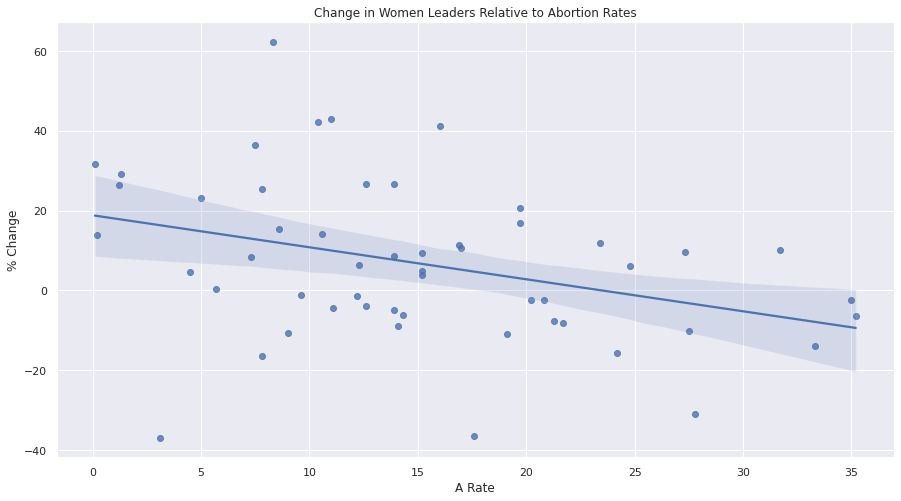

In [ ]:

sns.set(rc={'figure.figsize':(15,8)})
sns.regplot(df['A Rate'], df['% Change'])
plt.title('Change in Women Leaders Relative to Abortion Rates')
plt.savefig('Change in Women Leaders Relative to Abortion Rates.png')


<AxesSubplot:xlabel='A Rate', ylabel='Last'>

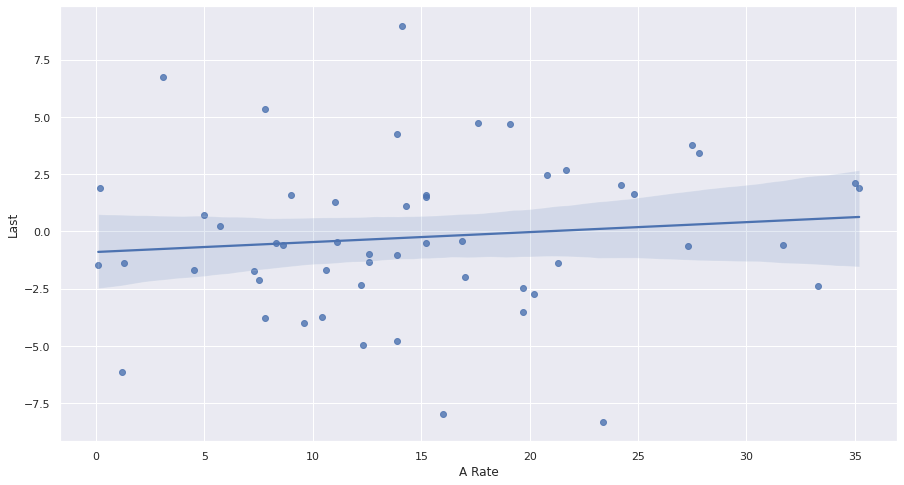

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.regplot(df['A Rate'], df['Last'])


<AxesSubplot:xlabel='A Rate', ylabel='% Change'>

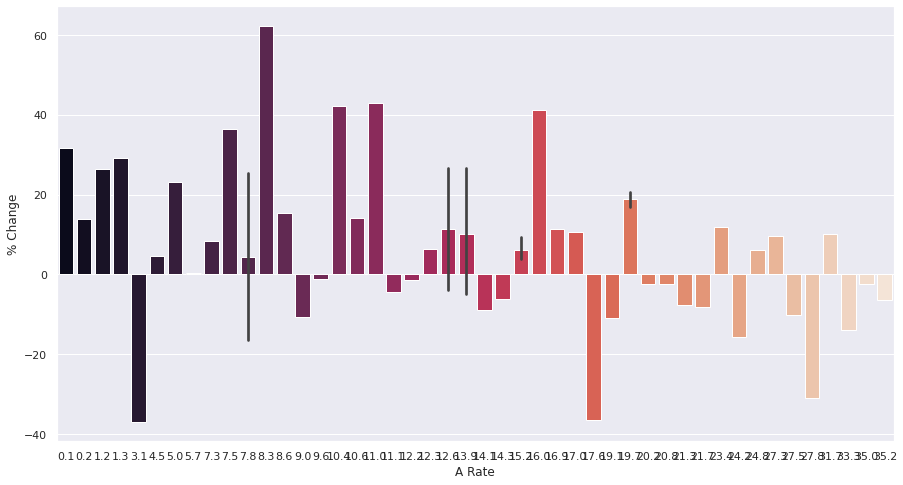

In [ ]:

sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(df['A Rate'], df['% Change'], palette = 'rocket')

<AxesSubplot:xlabel='A Rate', ylabel='Percent'>

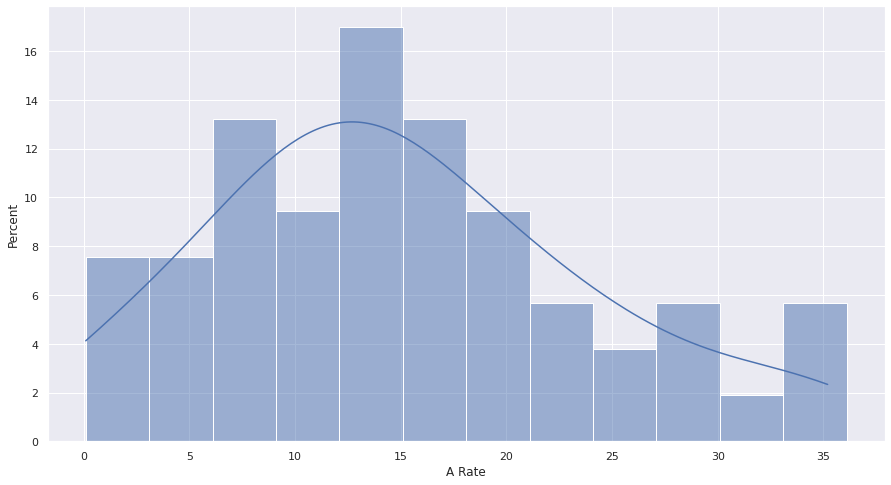

In [ ]:

sns.histplot(data = df['A Rate'], stat = 'percent', bins = 10, binwidth = 3, kde = True)


<AxesSubplot:xlabel='% Change', ylabel='Count'>

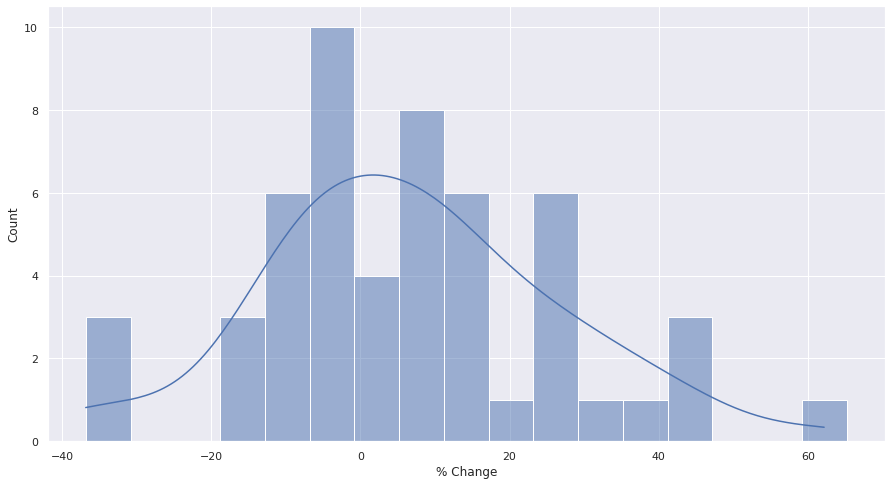

In [ ]:


sns.histplot(data = df['% Change'], stat = 'count', bins = 10, binwidth = 6, kde = True)



# Section 3 : Exporting our Data for use in the next file

In [ ]:
fe_df.to_csv('%Women_leaders.csv')
df.to_csv('Combination_abor_fe.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e65e4682-94f8-467d-81b0-a103b6f7bbb1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>